# Week 1: Supervised Learning & Regression
#### Design Thinking and Predictive Analytics for Data Products

*An Introduction to Statistical Learning* introduces supervised learning as "building a statistical model for predicting, or estimating, an *output* based on one or more *inputs*". This is the core difference between supervised and unsupervised learning; in unsupervised learning, there is no direct output, but we can still learn about relationships and structures in the data. As a general rule of thumb, we tend to refer to problems with a *quantitative response* as regression problems, while those involving a *qualitative response* are often referred to as classification problems. The type(s) of predictors are not usually that important when making this distinction.

This week we were introduced to the concept of supervised learning. We then learned about regression and how we can do this in Python. In this notebook, we will go over basic linear regression (through library and manual approaches) and autoregression as shown in lecture videos.

---

## Part 1: Linear Regression
In the most basic form of linear regression, we assume that there is approximately a linear relationship between $x$ and $y$. In the lectures, we saw this as:

$$y = x_0\theta_0 + x_1\theta_1 + x_2\theta_2 + ... + x_n\theta_n$$

Linear regression is very flexible, with a million different applications! For example, you can investigate the effect of advertising budget on product sales, how much SAT scores predict university GPA, or even the relationship between teen birthrate and poverty level. Here, we will investigate some beer ratings.

### The Data

Unzip the `beer_50000.json` file in the Week 2 folder. This dataset contains 50,000 reviews of beers with features like the style of beer and beer taste ratings. For this notebook, we will be looking at how well a beer's overall rating can be predicted with its taste and appearance.

### Reading the Data
Specify the path of the file. You may need to change the given path according to your local environment. This should be familiar if you took Course 1 (*Basic Data Ingestion, Processing, and Visualization*) of the Python Data Products specialization already.

In [2]:
import numpy
import urllib.request # read and open URLs

# Recall: the "def" keyword in Python defines a function.
# What does this function do?
def parseData(filename):
  for line in urllib.request.urlopen(filename):
    yield eval(line)

# Process the data
print ("Reading data...")
data = list(parseData("file:///C:/Users/Ian/Documents/PythonDataProducts4PredictiveAnalytics/DesignThinking&PredictiveAnalytics4DataProducts/Final_Course2/datasets/beer_50000.json"))
 

# Take a look at the output. Which features could be interesting to look at?
data[0]

Reading data...


{'review/appearance': 2.5,
 'beer/style': 'Hefeweizen',
 'review/palate': 1.5,
 'review/taste': 1.5,
 'beer/name': 'Sausa Weizen',
 'review/timeUnix': 1234817823,
 'beer/ABV': 5.0,
 'beer/beerId': '47986',
 'beer/brewerId': '10325',
 'review/timeStruct': {'isdst': 0,
  'mday': 16,
  'hour': 20,
  'min': 57,
  'sec': 3,
  'mon': 2,
  'year': 2009,
  'yday': 47,
  'wday': 0},
 'review/overall': 1.5,
 'review/text': 'A lot of foam. But a lot.\tIn the smell some banana, and then lactic and tart. Not a good start.\tQuite dark orange in color, with a lively carbonation (now visible, under the foam).\tAgain tending to lactic sourness.\tSame for the taste. With some yeast and banana.',
 'user/profileName': 'stcules',
 'review/aroma': 2.0}

### Part 2a: NumPy
We will use the NumPy library to do the heavy lifting in this section, already imported above. Let's take a look at what is in our dataset. We will use the *ratings of a beer's appearance and taste* as the **features** (the variables that will predict) and a *beer's overall rating* as the **label** (what to predict).

In [3]:
# What does this function do? Complete it by filling in the brackets.
# Why did we structure the data this way? Review the video "Regression in Python" for more detail.

def feature(datum):
    feat = [1, datum['review/appearance'], datum['review/taste']]
    return feat

In [4]:
X = [feature(d) for d in data]
y = [d['review/overall'] for d in data]

# Look at first 10 rows of X and y
print("Label: ", y[:10], "\nFeature:", X[:10])

Label:  [1.5, 3.0, 3.0, 3.0, 4.0, 3.0, 3.5, 3.0, 4.0, 4.5] 
Feature: [[1, 2.5, 1.5], [1, 3.0, 3.0], [1, 3.0, 3.0], [1, 3.5, 3.0], [1, 4.0, 4.5], [1, 3.5, 3.5], [1, 3.5, 4.0], [1, 3.5, 3.5], [1, 3.5, 4.0], [1, 5.0, 4.0]]


Now let's find the parameters for this linear regression model with NumPy's `lstsq` function. 

**History Tidbits:** *At the beginning of the nineteenth century, Legendre and Gauss published papers on the method of **least squares**, which implemented the earliest form of what is now known as linear regression. The approach was first successfully applied to problems in astronomy.*

**NumPy Documentation:** https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq

In [5]:
theta,residuals,rank,s = numpy.linalg.lstsq(X, y, rcond=None)
theta

array([0.58068254, 0.13475323, 0.70946662])

### Part 2b: Manual Lifting
This section is for you to better examine the linear algebra behind linear regression. Recall from the "Supervised Learning: Regression" lecture that the general form of a linear regression model is $$X\theta = y$$ where we need to solve for $\theta$. We do so by multiplying each side of the formula with the inverse of the multiplication of X-transposed and X, or $(X^TX)^{-1}$. We are left with $$\theta = (X^TX)^{-1}X^Ty$$ as seen below. Do you get the same answer as when we performed linear regression with NumPy's provided method?

In [6]:
X = numpy.matrix(X)
y = numpy.matrix(y)
numpy.linalg.inv(X.T * X) * X.T * y.T

matrix([[0.58068254],
        [0.13475323],
        [0.70946662]])

So what do these numbers mean? Recall that the general formula is $y = \theta_0 + \theta_1*X_1 + \theta_2*X_2 + ... + \theta_n*X_n$, where $\theta$ represents the weights of each feature.

So, you can predict that a beer's overall rating will be in the ballpark of $0.581 + 0.135 * appearance + 0.709 * taste$. You can see this with the first review in the dataset: $0.581 + 0.135(2.5) + 0.709(1.5) = 1.98$, which isn't too far off from its actual overall rating of 1.5!

You can try out a few more linear regression examples on your own with the given dataset. Do earlier reviews give higher ratings? Do palate or aroma reviews matter? Is there a relationship between the length of a beer's name and the length of the reviewer's name?

---

## Part 2: Autoregression

"Autoregression is a time series model that uses *observations from previous time steps* as input to a regression equation to predict the value at the next time step." - [Machine Learning Mastery]("https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/")

### The Data

Unzip the `weatherHistory.csv` file in the Week 2 folder. This dataset contains over 96,000 hourly weather reports with features like pressure and humidity. For this notebook, we will be looking at how well past windspeeds can predict future windspeeds.

Source: https://www.kaggle.com/muthuj7/weather-dataset/home

### Reading the Data
Specify the path of the file. You may need to change the given path according to your local environment. This should be familiar if you took Course 1 (*Basic Data Ingestion, Processing, and Visualization*) of the Python Data Products specialization already.

In [7]:
import numpy
file = open("C:/Users/Ian/Documents/PythonDataProducts4PredictiveAnalytics/DesignThinking&PredictiveAnalytics4DataProducts/Final_Course2/datasets/weatherHistory.csv", 'r')

dataset = []
header = file.readline().strip().split(',')
for line in file:
    line = line.split(',')
    dataset.append(line)
    
header

['Formatted Date',
 'Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)',
 'Daily Summary']

In [8]:
# Which column holds the wind speeds, the thing we are interested in?
header.index('Wind Speed (km/h)')

6

In [9]:
dataset = [d for d in dataset if d[6] != 'NA'] # get only existing values of windspeed
dataset[0]

['2006-04-01 00:00:00.000 +0200',
 'Partly Cloudy',
 'rain',
 '9.472222222222221',
 '7.3888888888888875',
 '0.89',
 '14.1197',
 '251.0',
 '15.826300000000002',
 '0.0',
 '1015.13',
 'Partly cloudy throughout the day.\n']

Now that we have our dataset, we need a way to define our moving window of values for autoregression. Let's create a function that will do this for us.

In [10]:
def feature(dataset, index, windowSize):
    feat = [1]
    previousValues = [float(d[6]) for d in dataset[index - windowSize:index]]
    return feat + previousValues

# Set some constants for autoregression
windowSize = 24;      # Window = one day
N = len(dataset)      # defines limit of features

Consider this line: `previousValues = [float(d[6]) for d in dataset[index - windowSize:index]]`

What does `dataset[index - windowSize:index]` look like? 

Let's take a trivial example where `index = 20` and `windowSize = 10`. Then, we are looking at `dataset[20 - 10: 20]`, or more simply `dataset[10:20]`. Notice that the size of this chunk of dataset is exactly the window size we are looking for! Now we can use the function above to generate a "moving window" of values for our feature.

In [11]:
X = [feature(dataset, index, windowSize) for index in range(windowSize, N)]
y = [float(d[6]) for d in dataset[windowSize:]]

# Let's see what our predictors look like
print("Features: ", X[0], "\nLabels: ", y[0])

Features:  [1, 14.1197, 14.2646, 3.9284000000000003, 14.1036, 11.0446, 13.9587, 12.3648, 14.1519, 11.3183, 12.525800000000002, 17.5651, 19.7869, 21.944300000000002, 20.6885, 15.375500000000002, 10.4006, 14.4095, 11.157300000000001, 8.5169, 7.631400000000001, 7.3899, 4.9266000000000005, 6.6493, 3.9284000000000003] 
Labels:  16.985500000000002


Let's get back to NumPy and its handy-dandy linear algebra library. 

In [12]:
theta,residuals,rank,s = numpy.linalg.lstsq(X, y, rcond=None)
theta

array([ 1.04934363, -0.01724757,  0.01468831,  0.0123844 ,  0.02823784,
       -0.00179876,  0.00827176,  0.00825164,  0.00596233, -0.00724837,
        0.00730104, -0.00595548, -0.00703406,  0.00382461, -0.0020421 ,
       -0.01251719,  0.00821453, -0.00772664, -0.01345461,  0.0117188 ,
        0.00188869, -0.00534872,  0.05144874,  0.15929295,  0.66181832])

Note that the last element in this 25-dimensional array corresponds to the most recent observation in the window. So, the autoregression model looks like: $$y = 1.05 - 0.0172 * Obs_1 + 0.0147 * Obs_2 + ... + 0.662 * Obs_n$$

Try out a few more autoregression examples on your own with the given dataset. What can you do with temperature, visibility, or pressure? A different window size?

<class 'pandas.core.frame.DataFrame'>


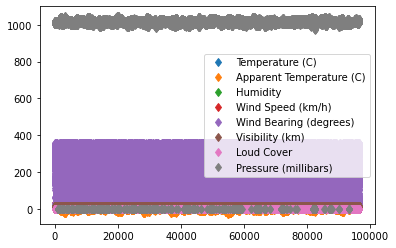

In [17]:
import pandas
from pandas import Series
from matplotlib import pyplot

series = pandas.read_csv('C:/Users/Ian/Documents/PythonDataProducts4PredictiveAnalytics/DesignThinking&PredictiveAnalytics4DataProducts/Final_Course2/datasets/weatherHistory.csv', header=0)
print (type(series))

series.plot(style='d')
pyplot.show()